---
title: Model calibration
author: "Nguyễn Ngọc Bình"
---

## Model calibration

Model calibration is a process used in machine learning to ensure that the predicted probabilities from a classification model reflect the true likelihood of the corresponding outcomes. In classification tasks, a well-calibrated model should produce probability estimates that are both reliable and accurate. This is important because many machine learning applications, such as risk assessment, medical diagnosis, and fraud detection, rely on these probability estimates to make decisions.

Calibration involves adjusting the predicted probabilities from a model to align them with the actual outcomes. There are several methods to calibrate models, and the choice of method depends on the specific algorithm and problem. Some common calibration techniques include:

1. Platt Scaling: This is a simple method that fits a logistic regression model to the output of the original model. It essentially learns a transformation to map the model's raw scores to calibrated probabilities.

2. Isotonic Regression: Isotonic regression is a non-parametric approach that fits a piecewise-constant, non-decreasing function to the predicted probabilities. It can be more flexible than Platt scaling in some cases.

3. Beta Calibration: This method models the predicted probabilities as Beta distributions and estimates the parameters of these distributions to better match the observed outcomes.

4. Histogram Binning: This technique divides the predicted probabilities into bins and estimates the true class frequencies within each bin. It then uses these frequencies to adjust the predicted probabilities.

5. Bayesian Calibration: Bayesian methods can be used to update the model's probability estimates based on prior knowledge or data. This approach can be especially useful when you have a limited amount of data.

The goal of model calibration is to ensure that, for instance, if a model predicts a 70% probability of an event happening, it should be correct approximately 70% of the time in practice. Calibrated models provide more meaningful and reliable probability estimates, making them easier to interpret and use for decision-making. In applications where it's important to understand the level of confidence associated with predictions, model calibration is a critical step in improving the model's utility.

## History of calibration models

The history of calibration models in the context of machine learning and statistics is closely tied to the need for well-calibrated probability estimates, especially in classification tasks. Here's a brief overview of the history and development of calibration models:

1. **Early Days of Probability Estimation (Pre-2000s):** In the early years of machine learning and statistics, the primary focus was on developing classification models that predict class labels. Probability estimates were often not a central concern.

2. **Rise of Support Vector Machines (SVMs):** In the 1990s and early 2000s, Support Vector Machines gained popularity. These models produced decision functions that were not inherently calibrated probability estimates, leading to a need for calibration techniques.

3. **Platt Scaling (1999):** John Platt introduced Platt Scaling, a logistic regression-based calibration technique, in his paper "Probabilistic Outputs for Support Vector Machines and Comparisons to Regularized Likelihood Methods." This method became one of the earliest and widely used approaches for converting SVM scores into well-calibrated probabilities.

4. **Logistic Regression Calibration:** Logistic regression, a well-established statistical technique, was used as an early calibration method for various classifiers. It helped map model scores to calibrated probabilities.

5. **Development of Calibration Metrics (2000s):** During this period, researchers started to develop calibration metrics, such as the Brier Score and calibration plots, to quantitatively measure the calibration performance of models.

6. **Bayesian Calibration (2000s):** Bayesian approaches for calibration started to gain attention. These methods allow for the incorporation of prior knowledge and often provide robust calibration.

7. **Isotonic Regression (2000s):** Isotonic regression became a popular non-parametric technique for calibration. It offers flexibility by allowing for monotonic transformations of probability estimates.

8. **Improvements in Machine Learning Models (2010s):** The advancement of machine learning models, such as gradient-boosted trees and neural networks, led to the need for more advanced calibration methods. Techniques like **Beta Calibration** started to emerge.

9. **Software Libraries and Packages:** As machine learning and data science gained prominence, software libraries and packages like scikit-learn and TensorFlow included calibration functionalities, making it easier for practitioners to apply calibration techniques.

10. **Ongoing Research and Development:** Research in calibration continues, focusing on more complex models, large-scale applications, and novel techniques. The field is evolving to address challenges in deep learning and ensemble methods.

In summary, the history of calibration models reflects the growing awareness of the importance of well-calibrated probability estimates in various machine learning applications. Over the years, a variety of techniques and methods have been developed to address calibration issues, enabling machine learning models to provide more reliable and interpretable probability estimates for informed decision-making. The field continues to evolve as new challenges and opportunities emerge in machine learning and data analysis.

## Beta Calibration

Beta Calibration is one of the more recent calibration techniques that has gained attention in the field of machine learning. Its emergence can be attributed to several factors:

1. **Improved Calibration Needs:** As machine learning models have become increasingly popular for a wide range of applications, the need for well-calibrated probability estimates has grown. Many machine learning models, including complex ensemble methods and deep learning models, often produce uncalibrated or poorly calibrated probability estimates. This need for improved calibration led to the exploration of novel calibration techniques, including Beta Calibration.

2. **Flexibility in Modeling Probability Distributions:** Beta Calibration offers flexibility in modeling probability distributions. It assumes that predicted probabilities can be represented by a Beta distribution, which is a flexible parametric distribution. This flexibility allows it to capture a wide range of probability distribution shapes, making it suitable for a variety of real-world scenarios.

3. **Suitability for Imbalanced Datasets:** In many practical applications, datasets are imbalanced, meaning one class significantly outnumbers the other. Traditional calibration techniques may not be effective in such cases. Beta Calibration's ability to handle imbalanced data by modeling the distribution of predicted probabilities is a valuable feature.

4. **Addressing Overconfidence or Underconfidence:** Beta Calibration is effective in addressing issues of model overconfidence or underconfidence. Some models may produce predicted probabilities that are too extreme (close to 0 or 1) and do not accurately reflect the true likelihood of events occurring. Beta Calibration can moderate these extreme probabilities to provide more reliable estimates.

5. **Growing Research and Tools:** As researchers and practitioners have recognized the importance of calibration, there has been an increased focus on developing and providing tools and libraries that support calibration techniques. The availability of software packages like the `betacal` package has made it easier for data scientists to apply Beta Calibration.

6. **Comparative Studies:** Comparative studies and evaluations of different calibration techniques have highlighted the effectiveness of Beta Calibration in certain scenarios. This has contributed to its adoption and prominence.

7. **Versatility in Calibration Challenges:** Beta Calibration can be used in a wide range of applications and is not limited to specific types of models or datasets. Its versatility in addressing calibration challenges makes it a valuable addition to the calibration toolbox.

In summary, Beta Calibration emerged as a response to the growing need for more advanced and flexible calibration techniques that can handle a variety of machine learning models and data scenarios. Its ability to model predicted probabilities as Beta distributions and address issues like overconfidence or underconfidence has made it a valuable tool for improving the reliability and utility of machine learning models in practical applications.

In [17]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
# Load the German Credit Data
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
column_names = ['existing_checking', 'duration', 'credit_history', 'purpose', 'credit_amount', 'savings',
                'employment', 'installment_rate', 'personal_status', 'other_debtors', 'residence_since',
                'property', 'age', 'other_installment_plans', 'housing', 'existing_credits', 'job', 'people_liable',
                'telephone', 'foreign_worker', 'class']
data = pd.read_csv(data_url, delimiter=' ', names=column_names)

# Preprocess the data
X = data.drop('class', axis=1)
y = data['class']
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)
X_cal, X_test, y_cal, y_test = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test)
y_train[y_train == 2] = 0
y_test[y_test == 2] = 0
y_cal[y_cal == 2] = 0

In [18]:
y_cal.value_counts()

1    175
0     75
Name: class, dtype: int64

In [21]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import brier_score_loss
import matplotlib.pyplot as plt

# Load the German Credit Data
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
column_names = ['existing_checking', 'duration', 'credit_history', 'purpose', 'credit_amount', 'savings',
                'employment', 'installment_rate', 'personal_status', 'other_debtors', 'residence_since',
                'property', 'age', 'other_installment_plans', 'housing', 'existing_credits', 'job', 'people_liable',
                'telephone', 'foreign_worker', 'class']
data = pd.read_csv(data_url, delimiter=' ', names=column_names)

# Preprocess the data
X = data.drop('class', axis=1)
y = data['class']
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)
X_cal, X_test, y_cal, y_test = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test)

# Convert class labels to binary (0 and 1)
y_train = (y_train == 1).astype(int)
y_cal = (y_cal == 1).astype(int)
y_test = (y_test == 1).astype(int)

In [61]:
# Train a classifier (LightGBM in this example)
clf = lgb.LGBMClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict probabilities on the test set
predicted_probabilities = clf.predict_proba(X_test)[:, 1]
cal_probas = clf.predict_proba(X_cal)[:, 1] 

# Isotonic Calibration
iso_calibrator = IsotonicRegression()
iso_calibrator.fit(cal_probas, y_cal)
iso_calibrated_probabilities = iso_calibrator.predict(cal_probas)
iso_brier = brier_score_loss(y_cal, iso_calibrated_probabilities)
print(f'Brier Score after Isotonic Calibration: {iso_brier:.4f}')

# Logistic Calibration
logistic_calibrator = LogisticRegression(C=99999999999)
logistic_calibrator.fit(cal_probas.reshape(-1, 1), y_cal)
logistic_calibrated_probabilities = logistic_calibrator.predict_proba(cal_probas.reshape(-1, 1))[:, 1]
logistic_brier = brier_score_loss(y_cal, logistic_calibrated_probabilities)
print(f'Brier Score after Logistic Calibration: {logistic_brier:.4f}')

# Beta Calibration
from betacal import BetaCalibration
beta_calibrator = BetaCalibration()
beta_calibrator.fit(cal_probas, y_cal)
beta_calibrated_probabilities = beta_calibrator.predict(cal_probas)
beta_brier = brier_score_loss(y_cal, beta_calibrated_probabilities)
print(f'Brier Score after Beta Calibration: {beta_brier:.4f}')


Brier Score after Isotonic Calibration: 0.1745
Brier Score after Logistic Calibration: 0.1876
Brier Score after Beta Calibration: 0.1827


In [66]:
from sklearn.metrics import roc_auc_score

# Calculate Gini coefficient for Isotonic calibration
gini_iso = 2 * roc_auc_score(y_cal, iso_calibrated_probabilities) - 1
print(f'Gini for Isotonic Calibration: {gini_iso:.4f}')

# Calculate Gini coefficient for Logistic calibration
gini_logistic = 2 * roc_auc_score(y_cal, logistic_calibrated_probabilities) - 1
print(f'Gini for Logistic Calibration: {gini_logistic:.4f}')

# Calculate Gini coefficient for Beta calibration
gini_beta = 2 * roc_auc_score(y_cal, beta_calibrated_probabilities) - 1
print(f'Gini for Beta Calibration: {gini_beta:.4f}')


Gini for Isotonic Calibration: 0.5006
Gini for Logistic Calibration: 0.4539
Gini for Beta Calibration: 0.4539


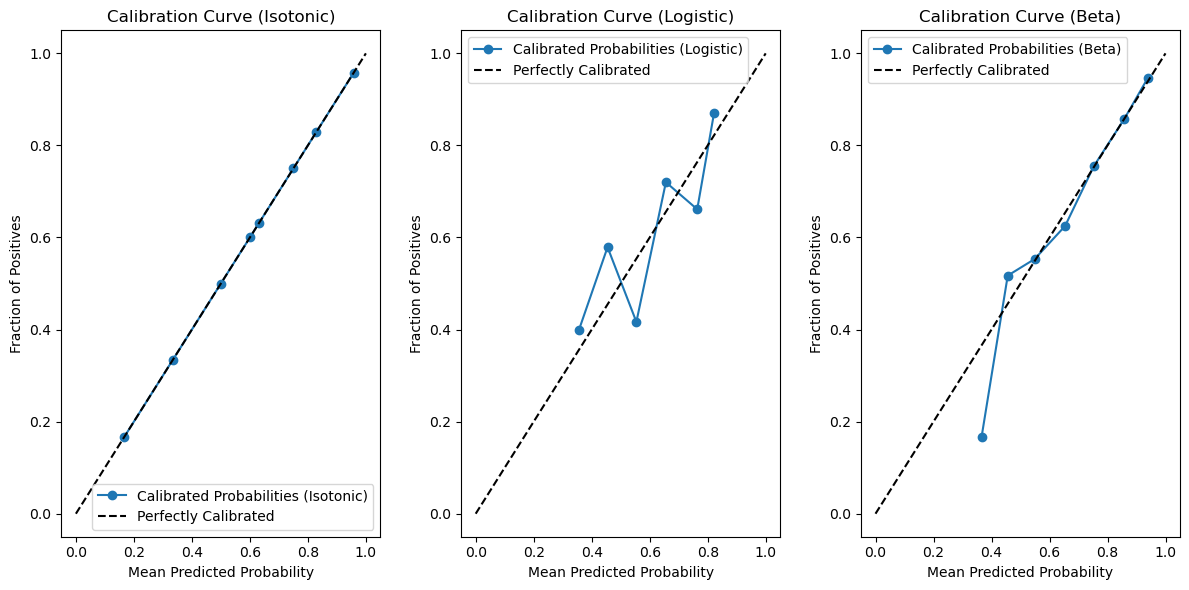

In [62]:
from sklearn.calibration import calibration_curve
# Generate calibration plots
plt.figure(figsize=(12, 6))

# Calibration Curve (Isotonic)
plt.subplot(131)
fraction_of_positives, mean_predicted_value = calibration_curve(y_cal, iso_calibrated_probabilities, n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives, marker='o', label='Calibrated Probabilities (Isotonic)')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve (Isotonic)')
plt.legend()

# Calibration Curve (Logistic)
plt.subplot(132)
fraction_of_positives, mean_predicted_value = calibration_curve(y_cal, logistic_calibrated_probabilities, n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives, marker='o', label='Calibrated Probabilities (Logistic)')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve (Logistic)')
plt.legend()

# Calibration Curve (Beta)
plt.subplot(133)
fraction_of_positives, mean_predicted_value = calibration_curve(y_cal, beta_calibrated_probabilities, n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives, marker='o', label='Calibrated Probabilities (Beta)')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve (Beta)')
plt.legend()

plt.tight_layout()
plt.show()

## Brier Score

The Brier Score, also known as the Brier Loss or Brier's Probability Score, is a commonly used metric to assess the calibration quality of probabilistic predictions generated by a classification model. The Brier Score quantifies the mean squared difference between predicted probabilities and actual outcomes. The formula for the Brier Score is as follows:

$$ \text{Brier Score} = \frac{1}{N} \sum_{i=1}^{N} (P_i - O_i)^2 $$

Where:
- $N$ is the total number of samples.
- $P_i$ is the predicted probability for the positive class (usually class 1) for sample i.
- $O_i$ is the actual outcome for sample i, which is binary (1 for a positive outcome, 0 for a negative outcome).

The Brier Score ranges from 0 to 1, where lower values indicate better calibration. A Brier Score of 0 means perfect calibration, where the predicted probabilities are identical to the actual outcomes. A Brier Score of 1 indicates the worst calibration, where the predicted probabilities are far from the true outcomes.

The Brier Score is used for calibration purposes for the following reasons:

1. **Measuring Calibration Quality:** The Brier Score provides a quantitative measure of how well the predicted probabilities align with the true outcomes. It directly assesses the calibration quality of a model's probability estimates.

2. **Sensitivity to Miscalibration:** It is sensitive to both overconfidence and underconfidence in predicted probabilities. If a model is poorly calibrated, the Brier Score will be high, highlighting the need for calibration.

3. **Comparison of Calibration Techniques:** The Brier Score allows for the comparison of different calibration techniques. It can help you evaluate the effectiveness of calibration methods in improving the reliability of probability estimates.

4. **Interpretability:** The Brier Score is easy to understand and interpret. Lower Brier Scores indicate better calibration, making it a useful metric for explaining the quality of probability estimates to stakeholders.

5. **Direct Application to Decision Thresholds:** In binary classification tasks, the Brier Score can assist in selecting appropriate decision thresholds. By analyzing the Brier Score at different threshold values, you can make decisions that balance precision and recall based on the calibration performance.

**Thresholds for Brier Score:**

- **Perfect Calibration (Threshold: 0)**: Achieving a Brier Score of 0 represents perfect calibration, where the model's predicted probabilities precisely match the actual outcomes. While this is the ideal calibration, it is rarely attainable in practice.

- **Good Calibration (Threshold: < 0.25)**: Brier Scores below 0.25 are often regarded as a benchmark for good calibration. In such cases, the predicted probabilities are reasonably aligned with the true outcomes, indicating reliable probability estimates.

- **Fair Calibration (Threshold: 0.25 - 0.5)**: Brier Scores falling between 0.25 and 0.5 suggest moderately calibrated models. While not perfect, these models provide fairly reliable probability estimates, making them suitable for various applications.

- **Poor Calibration (Threshold: > 0.5)**: Brier Scores exceeding 0.5 typically indicate poor calibration. Such scores imply that the model's predicted probabilities are unreliable for decision-making, as they deviate significantly from the actual outcomes.

- **Decision-Making Threshold (Application-Dependent)**: The choice of an acceptable Brier Score threshold depends on the specific application's criticality and requirements. In critical applications where decisions are heavily based on probabilities, a lower threshold (e.g., 0.1) might be necessary for confidence. In less critical scenarios, a threshold closer to 0.5 may be considered acceptable. The chosen threshold should align with the level of risk tolerance and the consequences of incorrect decisions within the application context.

In summary, the Brier Score is a valuable metric for evaluating the calibration of probabilistic predictions, making it an essential tool for assessing the reliability of classification models and the effectiveness of calibration techniques. Its simplicity and direct connection to calibration quality make it a widely used metric in machine learning and statistics.